In [74]:
import pandas as pd

In [2]:
# importing clean data for analysis

In [5]:
data_frame = pd.read_csv('C:/Users/rudra/OneDrive/Desktop/PDS/Q2/StudentsPerformance_clean.csv')
print(data_frame.to_string())

     Unnamed: 0  gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0             0  female        group B           bachelor's degree      standard                    none          72             72             74
1             1  female        group C                some college      standard               completed          69             90             88
2             2  female        group B             master's degree      standard                    none          90             95             93
3             3    male        group A          associate's degree  free/reduced                    none          47             57             44
4             4    male        group C                some college      standard                    none          76             78             75
5             5  female        group B          associate's degree      standard                    none          71  

In [4]:
# creating new column Average by taking the average of all the available scores

In [6]:
data_frame["Average_score"]=(data_frame["math score"]+data_frame["reading score"]+data_frame["writing score"])/3
print(data_frame["Average_score"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average_score, Length: 1000, dtype: float64


In [7]:

def Grade(Average_score):
    if (Average_score >= 95):return 'O'
    if (Average_score >= 81):return 'A'
    if (Average_score >= 71):return 'B'
    if (Average_score >= 61):return 'C'
    if (Average_score >= 51):return 'D'
    if (Average_score >= 41):return 'E'
    else: return 'F'
    
data_frame["grade"] = data_frame.apply(lambda x : Grade(x["Average_score"]),axis=1)
    

In [38]:
data_frame

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_score,grade
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,4,male,group C,some college,standard,none,76,78,75,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95,94.000000,A
996,996,male,group C,high school,free/reduced,none,62,55,55,57.333333,D
997,997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,C
998,998,female,group D,some college,standard,completed,68,78,77,74.333333,B


In [44]:
sorted_df = data_frame.sort_values(by='Average_score',ascending = False)

In [45]:
# using Seaborn for analysis

In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

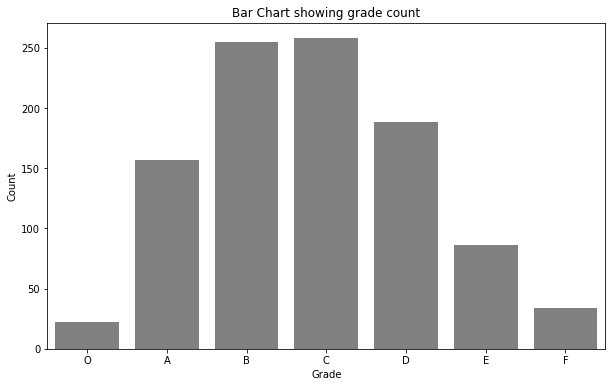

In [102]:
grades = sorted_df['grade']
value_counts = grades.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color="grey",order=["O", "A", "B", "C", "D", "E", "F"])
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Bar Chart showing grade count")
plt.show()

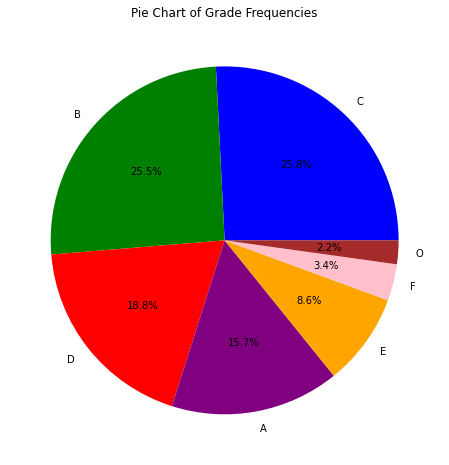

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown'])
plt.title("Pie Chart of Grade Frequencies")
plt.show()

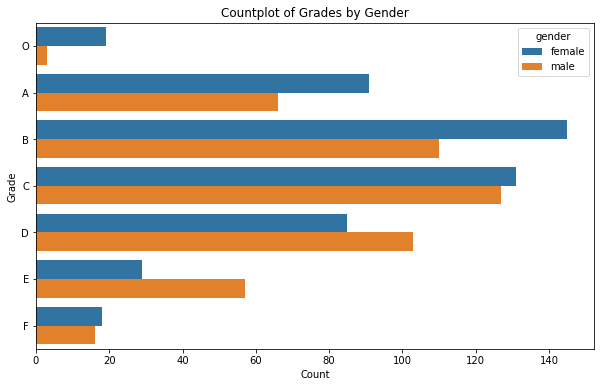

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="grade", hue="gender", data=data_frame, order=["O", "A", "B", "C", "D", "E", "F"])

# Customize labels and title
ax.set_xlabel("Count")
ax.set_ylabel("Grade")
ax.set_title("Countplot of Grades by Gender")

# Save the figure to a file
plt.savefig("C:/Users/rudra/OneDrive/Desktop/PDS/Q2/Analysis_Grade_gender.png")

# Show the plot 
plt.show()

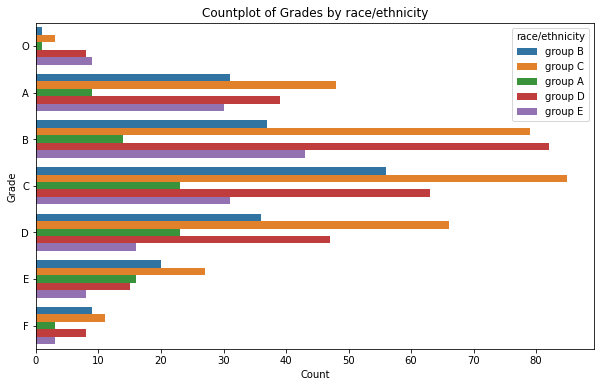

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="grade", hue="race/ethnicity", data=data_frame, order=["O", "A", "B", "C", "D", "E", "F"])

# Customize labels and title
ax.set_xlabel("Count")
ax.set_ylabel("Grade")
ax.set_title("Countplot of Grades by race/ethnicity")

# Save the figure to a file
plt.savefig("C:/Users/rudra/OneDrive/Desktop/PDS/Q2/Analysis_Grade_race.png")

# Show the plot 
plt.show()

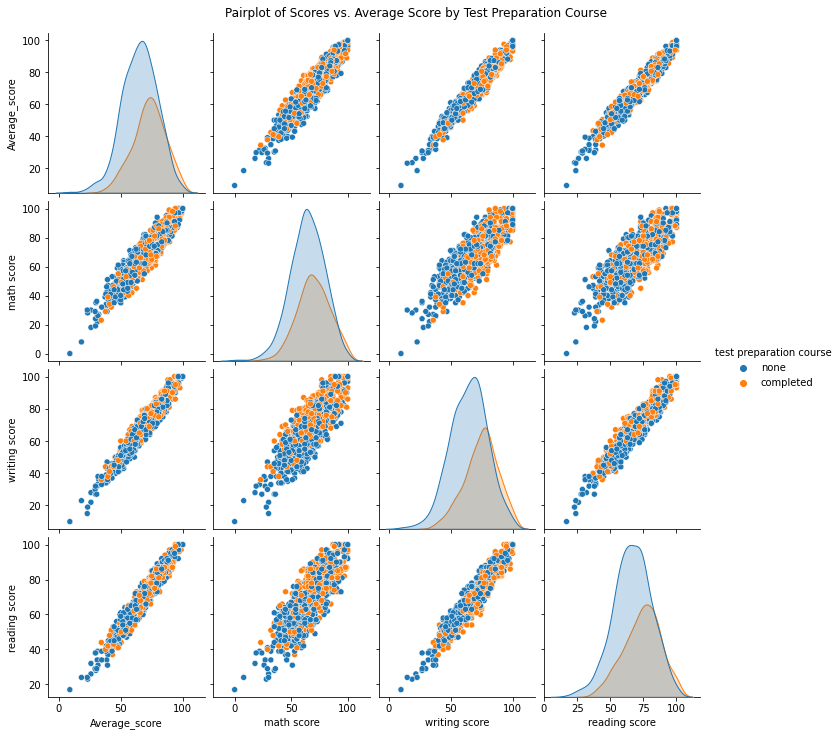

In [96]:
g = sns.pairplot(data_frame, hue='test preparation course', 
                 vars=['Average_score', 'math score', 'writing score', 'reading score'])

# Customize the plot (e.g., labels and title)
g.fig.suptitle("Pairplot of Scores vs. Average Score by Test Preparation Course", y=1.02)

# Save the plot to a file
plt.savefig("C:/Users/rudra/OneDrive/Desktop/PDS/Q2/Analysis_test_prepartion.png")

# Show the plot 
plt.show()
